 #  <font color='#7E9BC0'> Movies Recommendation | movielens.org. </font>

<b> </h4> **Data Cleaning Movies Recommendation | movielens.org** </b> 
</div>

<b> **Autors:**</b> 
Juan Pablo López Salazar, Bryan Urra Calfuñir.  
</div>

<b> **Data Source:**</b> 
F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. <https://doi.org/10.1145/2827872>
</div>

# **Libreries**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
import numpy as np
import re
%matplotlib inline


# **Importing Data**


In [20]:
movies = pd.read_csv("movies.csv",index_col=0)
ratings = pd.read_csv("ratings.csv")
ratings=ratings.rename(columns={'timestamp':'TimeRating'})

In [21]:
movies.columns

Index(['title', 'genres'], dtype='object')

In [22]:
movies

title  \
movieId                                            
1                               Toy Story (1995)   
2                                 Jumanji (1995)   
3                        Grumpier Old Men (1995)   
4                       Waiting to Exhale (1995)   
5             Father of the Bride Part II (1995)   
...                                          ...   
193876                   The Great Glinka (1946)   
193878   Les tribulations d'une caissière (2011)   
193880                  Her Name Was Mumu (2016)   
193882                              Flora (2017)   
193886                               Leal (2018)   

                                              genres  
movieId                                               
1        Adventure|Animation|Children|Comedy|Fantasy  
2                         Adventure|Children|Fantasy  
3                                     Comedy|Romance  
4                               Comedy|Drama|Romance  
5                                             Comedy  
...                                              ...  
193876                            (no genres listed)  
193878                                        Comedy  
193880                                         Drama  
193882                 Adventure|Drama|Horror|Sci-Fi  
193886                            Action|Crime|Drama  

[58098 rows x 2 columns]

In [23]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'TimeRating'], dtype='object')

In [24]:
ratings

userId  movieId  rating  TimeRating
0              1      307     3.5  1256677221
1              1      481     3.5  1256677456
2              1     1091     1.5  1256677471
3              1     1257     4.5  1256677460
4              1     1449     4.5  1256677264
...          ...      ...     ...         ...
27753439  283228     8542     4.5  1379882795
27753440  283228     8712     4.5  1379882751
27753441  283228    34405     4.5  1379882889
27753442  283228    44761     4.5  1354159524
27753443  283228    54286     4.5  1354159718

[27753444 rows x 4 columns]

For furter information abou the data sourche please check [Movielens.org](http://files.grouplens.org/datasets/movielens/ml-latest-README.html) or the file README_Dataset.txt that is inside the folder.

## **Dataframes**
* **Movies:** Provides the movie's name, gender and publication year.
* **ratings:** Provides the ratings gave for diferent users to a respective movie.

There are 57,771 movies

### **Movies dataset Analysis**

In [25]:
def Año(txt): #Function that separate the year from the movie's name 
    x=re.findall(r"[(]\d+[)]", txt)
    if len(x)>=1:
        return int (x[-1][1:5]) #this is the year
    else:
        return None #There are a few movies which don't have its year
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
movies['year'] =movies['title'].apply(Año)
movies=movies[movies['year']>0]
movies['year'] = movies['year'].astype(int) 
movies=movies[movies['year']>0]
genres_list=[]
for a in movies['genres']:
  genres_list=genres_list+a
genres=list(set(genres_list))
for b in genres:
  movies[b]=0
  for a in movies.index:
    if b in movies['genres'][a]:
      movies[b][a]=1
movies.drop('genres',axis=1,inplace=True)
movies.head()

<ipython-input-25-3094dab816e0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['year'] = movies['year'].astype(int)
<ipython-input-25-3094dab816e0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies[b][a]=1


title  year  Documentary  Mystery  War  \
movieId                                                                        
1                          Toy Story (1995)  1995            0        0    0   
2                            Jumanji (1995)  1995            0        0    0   
3                   Grumpier Old Men (1995)  1995            0        0    0   
4                  Waiting to Exhale (1995)  1995            0        0    0   
5        Father of the Bride Part II (1995)  1995            0        0    0   

         Western  Crime  Thriller  IMAX  Action  ...  Drama  Musical  \
movieId                                          ...                   
1              0      0         0     0       0  ...      0        0   
2              0      0         0     0       0  ...      0        0   
3              0      0         0     0       0  ...      0        0   
4              0      0         0     0       0  ...      1        0   
5              0      0         0     0       0  ...      0        0   

         Children  Comedy  Horror  Sci-Fi  Adventure  Fantasy  Film-Noir  \
movieId                                                                    
1               1       1       0       0          1        1          0   
2               1       0       0       0          1        1          0   
3               0       1       0       0          0        0          0   
4               0       1       0       0          0        0          0   
5               0       1       0       0          0        0          0   

         Romance  
movieId           
1              0  
2              0  
3              1  
4              1  
5              0  

[5 rows x 22 columns]

With this code the year column was created, as weel the categorical vairables of genres.

### **Número de Películas por año**

Text(0, 0.5, 'Movies Count')

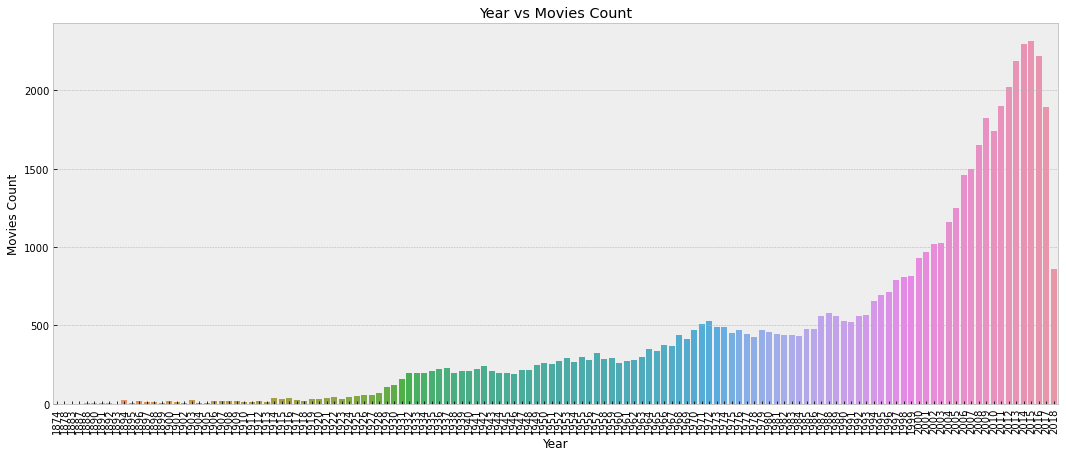

In [26]:
plt.figure(figsize=(18,7))
moviesYear=movies.groupby('year')['title'].count()
plt.title("Year vs Movies Count")
fig=sns.barplot(x=moviesYear.index, y=moviesYear.values)

fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
0
plt.xlabel("Year")
plt.ylabel("Movies Count")


There are are a big dispersion about the number of movies published for year, so we will only consider the movies published after 1990.
When a movie is old is more probable that only a person who wants to see it becuase he likes it will rate that movie, so its not very representative.

If you're using a normal computer use more recent movies, so you will not have problems running models.

In [27]:
movies=movies[movies['year']>1990]
movies

title  year  Documentary  Mystery  \
movieId                                                                        
1                               Toy Story (1995)  1995            0        0   
2                                 Jumanji (1995)  1995            0        0   
3                        Grumpier Old Men (1995)  1995            0        0   
4                       Waiting to Exhale (1995)  1995            0        0   
5             Father of the Bride Part II (1995)  1995            0        0   
...                                          ...   ...          ...      ...   
193872                    Room Laundering (2018)  2018            0        0   
193878   Les tribulations d'une caissière (2011)  2011            0        0   
193880                  Her Name Was Mumu (2016)  2016            0        0   
193882                              Flora (2017)  2017            0        0   
193886                               Leal (2018)  2018            0        0   

         War  Western  Crime  Thriller  IMAX  Action  ...  Drama  Musical  \
movieId                                               ...                   
1          0        0      0         0     0       0  ...      0        0   
2          0        0      0         0     0       0  ...      0        0   
3          0        0      0         0     0       0  ...      0        0   
4          0        0      0         0     0       0  ...      1        0   
5          0        0      0         0     0       0  ...      0        0   
...      ...      ...    ...       ...   ...     ...  ...    ...      ...   
193872     0        0      0         0     0       0  ...      1        0   
193878     0        0      0         0     0       0  ...      0        0   
193880     0        0      0         0     0       0  ...      1        0   
193882     0        0      0         0     0       0  ...      1        0   
193886     0        0      1         0     0       1  ...      1        0   

         Children  Comedy  Horror  Sci-Fi  Adventure  Fantasy  Film-Noir  \
movieId                                                                    
1               1       1       0       0          1        1          0   
2               1       0       0       0          1        1          0   
3               0       1       0       0          0        0          0   
4               0       1       0       0          0        0          0   
5               0       1       0       0          0        0          0   
...           ...     ...     ...     ...        ...      ...        ...   
193872          0       0       0       0          0        0          0   
193878          0       1       0       0          0        0          0   
193880          0       0       0       0          0        0          0   
193882          0       0       1       1          1        0          0   
193886          0       0       0       0          0        0          0   

         Romance  
movieId           
1              0  
2              0  
3              1  
4              1  
5              0  
...          ...  
193872         0  
193878         0  
193880         0  
193882         0  
193886         0  

[36336 rows x 22 columns]

# Ratings Dataset Analysis

In [28]:
ratings.drop('TimeRating',axis=1,inplace=True)
ratings=ratings[ratings['movieId'].isin(movies.index)]
rat_orig=ratings
ratings

userId  movieId  rating
0              1      307     3.5
1              1      481     3.5
4              1     1449     4.5
5              1     1590     2.5
6              1     1591     1.5
...          ...      ...     ...
27753429  283228     6377     5.0
27753430  283228     6874     4.0
27753441  283228    34405     4.5
27753442  283228    44761     4.5
27753443  283228    54286     4.5

[20122740 rows x 3 columns]

When we discarded the old movies we reduce the number of rows from 27.8 millions to 25.7 millions 

## Ratings for user

In [29]:
RatUser=ratings.groupby(by='userId')['rating'].agg([len,np.mean])
RatUser

len      mean
userId                 
1         9.0  3.111111
2         4.0  3.500000
3         6.0  3.666667
4       578.0  3.378893
5        67.0  4.276119
...       ...       ...
283224  122.0  3.516393
283225   15.0  3.033333
283226    8.0  1.750000
283227   13.0  4.038462
283228   43.0  4.151163

[280863 rows x 2 columns]

## Ratings Distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean', ylabel='Density'>

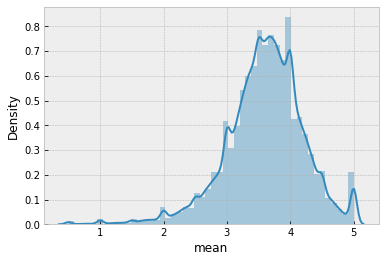

In [30]:
sns.distplot(RatUser['mean'])

In the distribution chart, we can see a distribution of the mean classification that are very similar to a normal distribution, but with the existance of people that have a very negative rates mean, and from now we'll call them "Haters". and as well people that classificate only the movies that they love and believe they are good. 

We consider that the haters not provide representative classification to this model, beacause the model try to provide movies that the people will love, but if they only classificate movies that they don't like it will not work.

In [31]:
Haters=RatUser[(RatUser['mean']<=2 )]
Haters

len      mean
userId                
20       2.0  2.000000
33       1.0  1.000000
49       5.0  1.800000
87      12.0  1.958333
102      9.0  1.000000
...      ...       ...
283108  11.0  1.727273
283134  24.0  1.500000
283141   8.0  1.937500
283218  22.0  1.318182
283226   8.0  1.750000

[5471 rows x 2 columns]

There are 4162 users wich a rating mean <= 2, and those are cataloged as haters, beacuse its rating are in general bad.

So in this code will not consider those users because of its big probability to don't like a movie.

### Rates per user

<AxesSubplot:title={'center':'Box plot Rates per user'}>

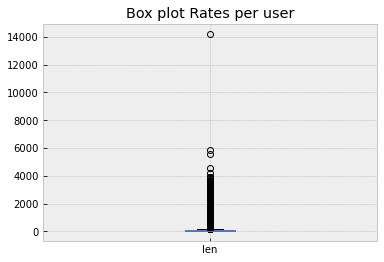

In [32]:
plt.title("Box plot Rates per user")
RatUser.boxplot('len')

In recommendation models, the users with high number of ratings help to improve the results of the model. For that reason the users with high quantify of rates will be consider even it seams as outliers

In [33]:
Q1 = RatUser['len'].quantile(0.25)
Q2 = RatUser['len'].quantile(0.5)
Q3 = RatUser['len'].quantile(0.75)
print(Q1,Q2,Q3)
RatUser=RatUser[(RatUser['len']>Q1)]
RatUser.sort_values(by='len')


10.0 23.0 70.0


len      mean
userId                   
69430      11.0  3.272727
53039      11.0  4.090909
211056     11.0  2.636364
41929      11.0  4.454545
58888      11.0  3.363636
...         ...       ...
37046    4213.0  3.163897
134596   4576.0  3.136582
111908   5597.0  1.453904
212343   5886.0  2.507136
123100  14219.0  3.097194

[206084 rows x 2 columns]

The rates from people with low quantify of rates isn't very useful for the model, for that reason will be removed all the users with less than 14 rates (Q1).

### Haters Analysis

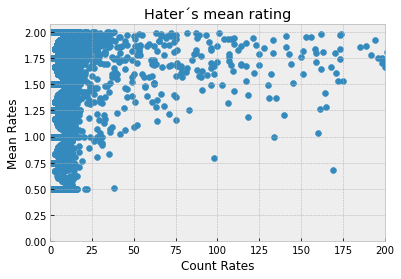

In [34]:
plt.scatter(x='len', y="mean", data=Haters)
plt.ylim(0,) # solo para hacer que el eje y parta del 0
plt.title("Hater´s mean rating")
plt.xlim([0,200])
plt.xlabel("Count Rates")
plt.ylabel("Mean Rates")
plt.show()

### Cleaning of Haters and people with few rates

In [35]:
ratings=ratings[(ratings['userId'].isin(Haters.index)==False) & (ratings['userId'].isin(RatUser.index))]
ratings

userId  movieId  rating
42             4        1     4.0
43             4        2     4.0
44             4        5     2.0
45             4        6     4.5
46             4       10     4.0
...          ...      ...     ...
27753429  283228     6377     5.0
27753430  283228     6874     4.0
27753441  283228    34405     4.5
27753442  283228    44761     4.5
27753443  283228    54286     4.5

[19569985 rows x 3 columns]

## Ratings per Movie

In [36]:
RatMovies=ratings.groupby(by='movieId').agg([len,np.mean])['rating'].sort_values(by='mean', ascending=False)
RatMovies['Película']=movies['title'][RatMovies.index]
RatMovies['Año']=movies['year'][RatMovies.index]
RatMovies.head(10)

len  mean                                           Película   Año
movieId                                                                    
129828   1.0   5.0              Lotte and the Moonstone Secret (2011)  2011
182781   1.0   5.0          Amori che non sanno stare al mondo (2017)  2017
182711   1.0   5.0                             The World of Us (2016)  2016
182657   1.0   5.0                                        Pale (2016)  2016
148298   2.0   5.0                                      Awaken (2013)  2013
182527   1.0   5.0                                Ciutat morta (2014)  2014
182435   2.0   5.0         The Most Wonderful Time of the Year (2008)  2008
182425   1.0   5.0  The 9-11 Hijackers - Inside The Hamburg Cell (...  2005
182351   1.0   5.0                                    Fidelity (2000)  2000
116513   1.0   5.0            'Master Harold' ... And the Boys (2010)  2010

### Count of rates per movie

In [37]:
Q1 = RatMovies['len'].quantile(0.25)
Q2 = RatMovies['len'].quantile(0.5)
Q3 = RatMovies['len'].quantile(0.75)
print(Q1,Q2,Q3)
RatMovies=RatMovies[(RatMovies['len']>30)]
RatMovies.sort_values(by='len')

2.0 8.0 54.0


len      mean                                           Película  \
movieId                                                                         
169488      31.0  3.822581                               Oklahoma City (2017)   
42208       31.0  3.016129                                      Paheli (2005)   
69714       31.0  2.000000            Kambakkht Ishq (Incredible Love) (2009)   
89449       31.0  3.016129  Beautiful Lies (De vrais mensonges) (Full Trea...   
4171        31.0  3.467742               Long Night's Journey Into Day (2000)   
...          ...       ...                                                ...   
2571     79093.0  4.156891                                 Matrix, The (1999)   
593      82665.0  4.158531                   Silence of the Lambs, The (1991)   
296      89279.0  4.180446                                Pulp Fiction (1994)   
356      90846.0  4.056574                                Forrest Gump (1994)   
318      91266.0  4.427558                   Shawshank Redemption, The (1994)   

          Año  
movieId        
169488   2017  
42208    2005  
69714    2009  
89449    2010  
4171     2000  
...       ...  
2571     1999  
593      1991  
296      1994  
356      1994  
318      1994  

[10691 rows x 4 columns]

If a movie is few times evaluated, could be bad for the model, because the results aren't significants, so it will only consider movies with at least 30 rate to be consider stadistical significant

### Rating Distrubution per movie

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean', ylabel='Density'>

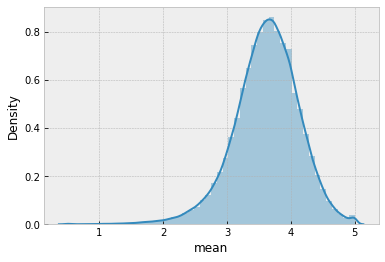

In [38]:
sns.distplot(RatUser['mean'])

In the chart can be identified a very bad rate group of movies, these movies will be consider as "Bad Movies", that aren't need in a model, which proposit is to sugest good recommendations.

### **Bad Movies**

It will be consider when the rating mean is <=3




In [39]:
BadMovies=RatMovies[(RatMovies['mean']<=3 )]
BadMovies.sort_values(by='len',ascending=False)

len      mean                                 Película   Año
movieId                                                                  
344      44086.0  2.994715        Ace Ventura: Pet Detective (1994)  1994
153      37243.0  2.900277                    Batman Forever (1995)  1995
231      37031.0  2.961357   Dumb & Dumber (Dumb and Dumber) (1994)  1994
208      30951.0  2.871006                        Waterworld (1995)  1995
19       24276.0  2.648707    Ace Ventura: When Nature Calls (1995)  1995
...          ...       ...                                      ...   ...
163547      31.0  2.887097                            Equity (2016)  2016
147262      31.0  2.887097               Faster than Rabbits (2014)  2014
31636       31.0  2.790323                       Bunker, The (2001)  2001
96066       31.0  2.516129           Love, Wedding, Marriage (2011)  2011
69714       31.0  2.000000  Kambakkht Ishq (Incredible Love) (2009)  2009

[2798 rows x 4 columns]

### **Delete Bad Movies**


In [40]:
ratings=ratings[(ratings['movieId'].isin(BadMovies.index)==False) & (ratings['movieId'].isin(RatMovies.index))]
ratings

userId  movieId  rating
42             4        1     4.0
43             4        2     4.0
44             4        5     2.0
45             4        6     4.5
46             4       10     4.0
...          ...      ...     ...
27753429  283228     6377     5.0
27753430  283228     6874     4.0
27753441  283228    34405     4.5
27753442  283228    44761     4.5
27753443  283228    54286     4.5

[16651769 rows x 3 columns]

<AxesSubplot:xlabel='rating'>

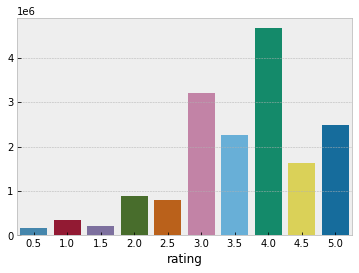

In [41]:
# Histogram 
count=ratings.groupby(['rating']).count()['userId']
count
sns.barplot(x=count.index, y=count.values)

In [43]:
df=pd.merge(movies,ratings,how='inner',on='movieId')
df

movieId                     title  year  Documentary  Mystery  War  \
0               1          Toy Story (1995)  1995            0        0    0   
1               1          Toy Story (1995)  1995            0        0    0   
2               1          Toy Story (1995)  1995            0        0    0   
3               1          Toy Story (1995)  1995            0        0    0   
4               1          Toy Story (1995)  1995            0        0    0   
...           ...                       ...   ...          ...      ...  ...   
16651764   192283  Crazy Rich Asians (2018)  2018            0        0    0   
16651765   192283  Crazy Rich Asians (2018)  2018            0        0    0   
16651766   192283  Crazy Rich Asians (2018)  2018            0        0    0   
16651767   192283  Crazy Rich Asians (2018)  2018            0        0    0   
16651768   192283  Crazy Rich Asians (2018)  2018            0        0    0   

          Western  Crime  Thriller  IMAX  ...  Children  Comedy  Horror  \
0               0      0         0     0  ...         1       1       0   
1               0      0         0     0  ...         1       1       0   
2               0      0         0     0  ...         1       1       0   
3               0      0         0     0  ...         1       1       0   
4               0      0         0     0  ...         1       1       0   
...           ...    ...       ...   ...  ...       ...     ...     ...   
16651764        0      0         0     0  ...         0       1       0   
16651765        0      0         0     0  ...         0       1       0   
16651766        0      0         0     0  ...         0       1       0   
16651767        0      0         0     0  ...         0       1       0   
16651768        0      0         0     0  ...         0       1       0   

          Sci-Fi  Adventure  Fantasy  Film-Noir  Romance  userId  rating  
0              0          1        1          0        0       4     4.0  
1              0          1        1          0        0      10     5.0  
2              0          1        1          0        0      14     4.5  
3              0          1        1          0        0      15     4.0  
4              0          1        1          0        0      22     4.0  
...          ...        ...      ...        ...      ...     ...     ...  
16651764       0          0        0          0        0  261224     3.5  
16651765       0          0        0          0        0  261870     0.5  
16651766       0          0        0          0        0  266861     3.5  
16651767       0          0        0          0        0  275841     3.0  
16651768       0          0        0          0        0  277968     3.5  

[16651769 rows x 25 columns]

### **Export DataFrame**

In [46]:
df.to_csv ('df.csv', mode ='w')